# Análisis Juego a Juego de Stephen Curry en la NBA


En este notebook, se analizarán los datos de partidos de la NBA de Stephen Curry en base a un dataset con resultados juego a juego.
Se realizará un análisis exploratorio inicial y se trabajará con las estadísticas de los partidos, con el objetivo de limpiar los datos y realizar un modelo predictivo más adelante.

A lo largo del análisis, se tratarán diferentes aspectos, como la eliminación de valores no deseados, limpieza de columnas irrelevantes, y finalmente se ajustará un modelo de regresión lineal para predecir los puntos anotados.


## 0. Introducción

## 0.1 Importación y Exploración Básica

In [5]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del archivo CSV
csv_file_path = 'nba_juego_a_juego.csv'  # Cambia esto a la ruta correcta si es necesario

# Leer el archivo CSV
df = pd.read_csv(csv_file_path)

# Mostrar las primeras filas del DataFrame
print("Las primeras filas del DataFrame son:")
df.head(10)

Las primeras filas del DataFrame son:


,Año,Fecha,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,FT%,R,A,BLK,STL,PF,TO,PTS
0,2021,Dom. 16/5,MEM,['113-101'],['G'],40,16-36,44.4,9-22,40.9,5-6,83.3,7.0,9.0,1.0,1.0,2.0,7.0,46.0
1,2021,Mar. 11/5,PHX,['122-116'],['G'],37,7-22,31.8,1-11,9.1,6-6,100.0,3.0,6.0,0.0,1.0,2.0,3.0,21.0
2,2021,Lun. 10/5,UTAH,['119-116'],['G'],37,11-25,44.0,3-13,23.1,11-12,91.7,4.0,6.0,0.0,2.0,1.0,3.0,36.0
3,2021,Sáb. 8/5,OKC,['136-97'],['G'],29,14-26,53.8,11-21,52.4,10-10,100.0,5.0,2.0,0.0,1.0,2.0,1.0,49.0
4,2021,Jue. 6/5,OKC,['118-97'],['G'],31,11-21,52.4,6-13,46.2,6-7,85.7,4.0,7.0,0.0,1.0,2.0,3.0,34.0
5,2021,Sáb. 1/5,HOU,['113-87'],['G'],30,9-23,39.1,7-17,41.2,5-7,71.4,5.0,5.0,0.0,1.0,0.0,4.0,30.0
6,2021,Jue. 29/4,MIN,['126-114'],['P'],37,11-27,40.7,6-17,35.3,9-9,100.0,6.0,8.0,0.0,2.0,4.0,3.0,37.0
7,2021,Mar. 27/4,DAL,['133-103'],['P'],30,9-18,50.0,5-9,55.6,4-4,100.0,1.0,2.0,0.0,2.0,1.0,2.0,27.0
8,2021,Dom. 25/4,SAC,['117-113'],['G'],38,11-21,52.4,7-14,50.0,8-11,72.7,7.0,4.0,1.0,1.0,1.0,7.0,37.0
9,2021,Vie. 23/4,DEN,['118-97'],['G'],34,11-18,61.1,4-9,44.4,6-6,100.0,8.0,3.0,0.0,0.0,3.0,3.0,32.0


In [6]:
# Información general sobre el DataFrame
print("\nInformación del DataFrame:")
df.info()


Información del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Año        208 non-null    int64  
 1   Fecha      208 non-null    object 
 2   OP         208 non-null    object 
 3   Resultado  208 non-null    object 
 4   Estado     208 non-null    object 
 5   MIN        208 non-null    object 
 6   FG         208 non-null    object 
 7   FG%        208 non-null    object 
 8   3PT        208 non-null    object 
 9   3P%        208 non-null    object 
 10  FT         208 non-null    object 
 11  FT%        208 non-null    float64
 12  R          208 non-null    float64
 13  A          208 non-null    float64
 14  BLK        208 non-null    float64
 15  STL        208 non-null    float64
 16  PF         184 non-null    float64
 17  TO         184 non-null    float64
 18  PTS        182 non-null    float64
dtypes: float64(8), int64(1

## 0.2 Funciones auxiliares

In [8]:
# Función para asignar los puntos
def asignar_puntos(row):
    # Limpiar el resultado y separar los puntos
    resultado_limpio = row['Resultado'].strip("[]'TE ")  # Eliminar los corchetes y comillas
    row['Estado'] = row['Estado'].strip("[]'TE ")
    puntos = resultado_limpio.split('-')
    
    puntos1 = int(puntos[0])  # Puntos del equipo
    puntos2 = int(puntos[1])    # Puntos del rival
    if row['Estado'] == 'G':
        row['puntosEquipo'] = puntos1
        row['puntosRival'] = puntos2
    else:  # Perdido
        row['puntosEquipo'] = puntos2
        row['puntosRival'] = puntos1
    
    return row

# Función para asignar los puntos
def asignar_puntos_lanzamiento(row, lanzamiento):
    # Limpiar el resultado y separar los puntos
    puntos = row['FG'].split('-')
    
    puntos_anotados = int(puntos[0])  # Puntos del equipo
    puntos_intentados = int(puntos[1])    # Puntos del rival
    
    if lanzamiento == 'FG':
        row['FG_metidos'] = puntos_anotados
        row['FG_intentados'] = puntos_intentados
    elif lanzamiento == 'FT':
        row['FT_metidos'] = puntos_anotados
        row['FT_intentados'] = puntos_intentados
    else:
        row['3PT_metidos'] = puntos_anotados
        row['3PT_intentados'] = puntos_intentados
    
    return row

### 1. Limpieza de datos:
Eliminar datos irrelevantes: Verifica que en tu DataFrame solo haya columnas relevantes para el análisis. En tu caso, puede que algunas columnas como "Resultado" o "OP" (oponente) no aporten directamente a la predicción y puedan eliminarse.
Manejo de valores nulos: Asegúrate de que no haya valores nulos en el dataset o trata de imputarlos.

In [10]:
# Supongamos que ya tienes tu DataFrame llamado df
# Crea una lista con los meses en inglés y las palabras a eliminar
months_in_english = ["january", "february", "march", "april", "may", 
                     "june", "july", "august", "september", 
                     "october", "november", "december", 
                     "Promedios", "Totales"]

# Filtrar el DataFrame para eliminar las filas que contienen esos valores en la columna 'fecha'
df_filtered = df[~df['Fecha'].str.contains('|'.join(months_in_english), na=False)]

In [11]:
df = df.drop(columns=['Fecha'])
print(df.isnull().sum())

df = df.dropna()

Año           0
OP            0
Resultado     0
Estado        0
MIN           0
FG            0
FG%           0
3PT           0
3P%           0
FT            0
FT%           0
R             0
A             0
BLK           0
STL           0
PF           24
TO           24
PTS          26
dtype: int64


In [12]:
df

,Año,OP,Resultado,Estado,MIN,FG,FG%,3PT,3P%,FT,FT%,R,A,BLK,STL,PF,TO,PTS
0,2021,MEM,['113-101'],['G'],40,16-36,44.4,9-22,40.9,5-6,83.3,7.0,9.0,1.0,1.0,2.0,7.0,46.0
1,2021,PHX,['122-116'],['G'],37,7-22,31.8,1-11,9.1,6-6,100.0,3.0,6.0,0.0,1.0,2.0,3.0,21.0
2,2021,UTAH,['119-116'],['G'],37,11-25,44.0,3-13,23.1,11-12,91.7,4.0,6.0,0.0,2.0,1.0,3.0,36.0
3,2021,OKC,['136-97'],['G'],29,14-26,53.8,11-21,52.4,10-10,100.0,5.0,2.0,0.0,1.0,2.0,1.0,49.0
4,2021,OKC,['118-97'],['G'],31,11-21,52.4,6-13,46.2,6-7,85.7,4.0,7.0,0.0,1.0,2.0,3.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,PHX,['134-105'],['P'],30,7-17,41.2,4-9,44.4,3-5,60.0,7.0,8.0,0.0,1.0,1.0,1.0,21.0
201,2023,SAC,['130-125'],['G'],31,11-22,50.0,7-12,58.3,4-4,100.0,5.0,2.0,0.0,1.0,3.0,2.0,33.0
202,2023,DEN,['128-123'],['P'],36,10-22,45.5,5-11,45.5,9-9,100.0,5.0,4.0,0.0,0.0,2.0,3.0,34.0
203,2023,LAL,['123-109'],['G'],33,10-22,45.5,4-13,30.8,9-9,100.0,6.0,7.0,1.0,4.0,1.0,4.0,33.0


### 2. Feature Engineering (Ingeniería de características):
Aquí, transformamos las variables para que sean más útiles para el modelo.

Variables de rendimiento: Puedes considerar agregar algunas características como el promedio de puntos en los últimos 'n' juegos, la tasa de acierto en tiros de campo, o minutos jugados como variables predictoras.
Datos temporales: Puedes crear variables que indiquen si es un partido de playoffs o regular season, o incluso usar la fecha para derivar alguna tendencia estacional.

In [14]:
df['puntosEquipo'] = 0
df['puntosRival'] = 0
# Aplicar la función al DataFrame
df = df.apply(asignar_puntos, axis=1)
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FG')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= '3PT')
df = df.apply(asignar_puntos_lanzamiento, axis=1, lanzamiento= 'FT')

In [31]:
df = df.drop(['FT','3PT', 'Resultado','FG', 'BLK', 'MIN','TO', 'A', 'PF', 'R', 'STL', 'MIN', 'FG%',  '3P%', 'FT%' ], axis=1)

In [35]:
# Ejemplo de creación de nuevas características
# robust_scaler = RobustScaler()

df['OP'] = df['OP'].astype('category').cat.codes
df['Estado'] = df['Estado'].astype('category').cat.codes

# O puedes rellenar valores nulos con la media
df = df.fillna(df.mean())


In [37]:
df

,Año,OP,Estado,PTS,puntosEquipo,puntosRival,FG_metidos,FG_intentados,3PT_metidos,3PT_intentados,FT_metidos,FT_intentados
0,2021,13,0,46.0,113,101,16,36,16,36,16,36
1,2021,22,0,21.0,122,116,7,22,7,22,7,22
2,2021,27,0,36.0,119,116,11,25,11,25,11,25
3,2021,19,0,49.0,136,97,14,26,14,26,14,26
4,2021,19,0,34.0,118,97,11,21,11,21,11,21
...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,22,1,21.0,105,134,7,17,7,17,7,17
201,2023,25,0,33.0,130,125,11,22,11,22,11,22
202,2023,7,1,34.0,123,128,10,22,10,22,10,22
203,2023,12,0,33.0,123,109,10,22,10,22,10,22


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 0 to 207
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Año             182 non-null    int64  
 1   OP              182 non-null    int8   
 2   Estado          182 non-null    int8   
 3   PTS             182 non-null    float64
 4   puntosEquipo    182 non-null    int64  
 5   puntosRival     182 non-null    int64  
 6   FG_metidos      182 non-null    int64  
 7   FG_intentados   182 non-null    int64  
 8   3PT_metidos     182 non-null    int64  
 9   3PT_intentados  182 non-null    int64  
 10  FT_metidos      182 non-null    int64  
 11  FT_intentados   182 non-null    int64  
dtypes: float64(1), int64(9), int8(2)
memory usage: 16.0 KB


In [41]:
# Promedio de puntos en los últimos 5, 10 y 25 partidos
for n in [5, 10, 25]:
    df[f'Avg_Points_Last_{n}'] = df['PTS'].rolling(window=n).mean()
    df[f'Avg_FT_Met_Last_{n}'] = df['FT_metidos'].rolling(window=n).mean()
    df[f'Avg_3PT_Met_Last_{n}'] = df['3PT_metidos'].rolling(window=n).mean()
    df[f'Avg_FG_Met_Last_{n}'] = df['FG_metidos'].rolling(window=n).mean()
    df[f'Avg_FT_Int_Last_{n}'] = df['FT_intentados'].rolling(window=n).mean()
    df[f'Avg_3PT_Int_Last_{n}'] = df['3PT_intentados'].rolling(window=n).mean()
    df[f'Avg_FG_Int_Last_{n}'] = df['FG_intentados'].rolling(window=n).mean()
    df[f'Avg_punt_equipo_Last_{n}'] = df['puntosEquipo'].rolling(window=n).mean()
    df[f'Avg_punt_rival_Last_{n}'] = df['puntosRival'].rolling(window=n).mean()

df = df.drop(columns=['puntosEquipo', 'puntosRival','FG_intentados','FT_intentados','3PT_intentados', 'FG_metidos', 'FT_metidos', '3PT_metidos'])
df = df.fillna(df.mean()).round(1)

In [43]:
df

,Año,OP,Estado,PTS,Avg_Points_Last_5,Avg_FT_Met_Last_5,Avg_3PT_Met_Last_5,Avg_FG_Met_Last_5,Avg_FT_Int_Last_5,Avg_3PT_Int_Last_5,...,Avg_punt_rival_Last_10,Avg_Points_Last_25,Avg_FT_Met_Last_25,Avg_3PT_Met_Last_25,Avg_FG_Met_Last_25,Avg_FT_Int_Last_25,Avg_3PT_Int_Last_25,Avg_FG_Int_Last_25,Avg_punt_equipo_Last_25,Avg_punt_rival_Last_25
0,2021,13,0,46.0,28.7,9.5,9.5,9.5,20.1,20.1,...,110.8,28.1,9.3,9.3,9.3,19.9,19.9,19.9,115.1,110.6
1,2021,22,0,21.0,28.7,9.5,9.5,9.5,20.1,20.1,...,110.8,28.1,9.3,9.3,9.3,19.9,19.9,19.9,115.1,110.6
2,2021,27,0,36.0,28.7,9.5,9.5,9.5,20.1,20.1,...,110.8,28.1,9.3,9.3,9.3,19.9,19.9,19.9,115.1,110.6
3,2021,19,0,49.0,28.7,9.5,9.5,9.5,20.1,20.1,...,110.8,28.1,9.3,9.3,9.3,19.9,19.9,19.9,115.1,110.6
4,2021,19,0,34.0,37.2,11.8,11.8,11.8,26.0,26.0,...,110.8,28.1,9.3,9.3,9.3,19.9,19.9,19.9,115.1,110.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,2023,22,1,21.0,28.0,9.4,9.4,9.4,19.8,19.8,...,116.9,28.7,9.8,9.8,9.8,19.7,19.7,19.7,119.0,115.9
201,2023,25,0,33.0,30.0,10.2,10.2,10.2,21.4,21.4,...,119.9,29.4,10.0,10.0,10.0,20.1,20.1,20.1,118.4,116.4
202,2023,7,1,34.0,30.4,10.2,10.2,10.2,21.0,21.0,...,120.5,29.8,10.1,10.1,10.1,20.1,20.1,20.1,118.8,116.5
203,2023,12,0,33.0,30.8,10.2,10.2,10.2,21.0,21.0,...,121.3,29.6,10.0,10.0,10.0,20.2,20.2,20.2,119.0,115.8


### 3. Separación de datos en variables predictoras y variable objetivo:
El objetivo es predecir los puntos, por lo que PTS será tu variable objetivo, y el resto serán tus features.

In [47]:
# Variables predictoras (features)
# Seleccionar todas las columnas excepto 'PTS'
X = df.loc[:, df.columns != 'PTS']

# Variable objetivo (target)
y = df['PTS']

### 4. División de los datos:
Divide los datos en conjunto de entrenamiento y prueba.

In [51]:
from sklearn.model_selection import train_test_split

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 5. Construcción del modelo de regresión lineal:
Entrena el modelo con los datos de entrenamiento.

In [54]:
from sklearn.linear_model import LinearRegression

# Crear el modelo
model = LinearRegression()

# Entrenar el modelo
model.fit(X_train, y_train)

LinearRegression()

### 6. Evaluación del modelo:
Evalúa el rendimiento del modelo con los datos de prueba.

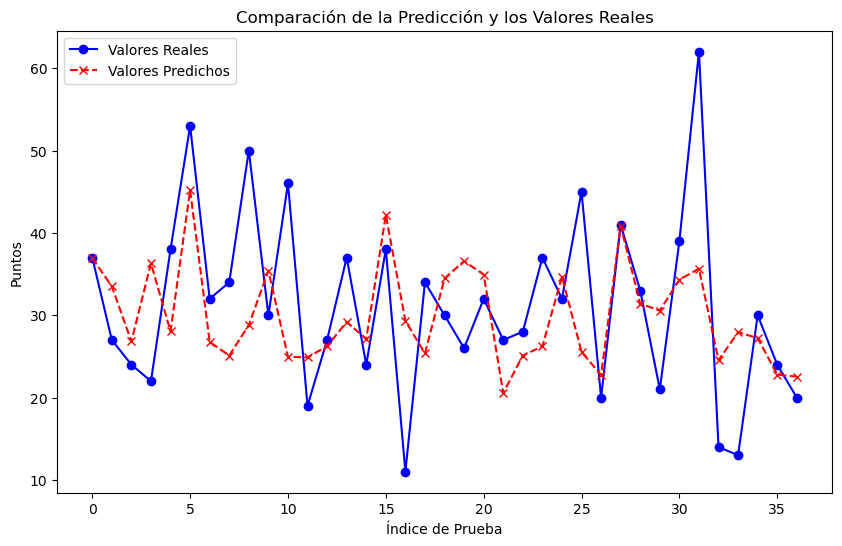

In [56]:
# Predicción
y_pred = model.predict(X_test)

# Gráfico de comparación entre los valores reales y predichos
plt.figure(figsize=(10, 6))

# Graficar los valores reales
plt.plot(y_test.values, label='Valores Reales', color='b', marker='o')

# Graficar los valores predichos
plt.plot(y_pred, label='Valores Predichos', color='r', linestyle='--', marker='x')

# Añadir título y etiquetas
plt.title('Comparación de la Predicción y los Valores Reales')
plt.xlabel('Índice de Prueba')
plt.ylabel('Puntos')

# Mostrar leyenda
plt.legend()

# Mostrar el gráfico
plt.show()

In [62]:
# Evaluación
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Mean Squared Error: 103.61631348290946
R2 Score: 0.13483493847141925


In [64]:
# Crear un DataFrame con los valores reales, predichos y la diferencia
resultados_df = pd.DataFrame({
    'Valor Real': y_test,
    'Valor Predicho': y_pred,
    'Diferencia': y_test - y_pred
})

# Mostrar las primeras filas del DataFrame
print(resultados_df.head(20))

     Valor Real  Valor Predicho  Diferencia
19         37.0       36.946943    0.053057
46         27.0       33.504728   -6.504728
174        24.0       26.830390   -2.830390
110        22.0       36.300383  -14.300383
166        38.0       28.042486    9.957514
15         53.0       45.181095    7.818905
25         32.0       26.762739    5.237261
76         34.0       25.103836    8.896164
128        50.0       28.824270   21.175730
108        30.0       35.395687   -5.395687
107        46.0       24.951400   21.048600
181        19.0       24.889905   -5.889905
78         27.0       26.235422    0.764578
124        37.0       29.187962    7.812038
49         24.0       27.116654   -3.116654
16         38.0       42.167143   -4.167143
55         11.0       29.309995  -18.309995
144        34.0       25.385188    8.614812
109        30.0       34.474153   -4.474153
60         26.0       36.573178  -10.573178


In [66]:
# Obtener los coeficientes de las variables
coeficientes = model.coef_

# Mostrar las columnas con sus respectivos coeficientes
variables_influencia = pd.DataFrame({'Variable': X.columns, 'Coeficiente': coeficientes})

# Ordenar las variables por la magnitud de su coeficiente
variables_influencia = variables_influencia.reindex(variables_influencia.Coeficiente.abs().sort_values(ascending=False).index)

# Mostrar las variables con mayor influencia
print(variables_influencia)

                   Variable  Coeficiente
22       Avg_FT_Met_Last_25     3.627146
24       Avg_FG_Met_Last_25     3.627146
23      Avg_3PT_Met_Last_25     3.627146
21       Avg_Points_Last_25    -2.746177
2                    Estado    -2.104493
6         Avg_FG_Met_Last_5     1.089215
4         Avg_FT_Met_Last_5     1.089215
5        Avg_3PT_Met_Last_5     1.089215
18       Avg_FG_Int_Last_10     0.806402
17      Avg_3PT_Int_Last_10     0.806402
16       Avg_FT_Int_Last_10     0.806402
0                       Año     0.601479
19  Avg_punt_equipo_Last_10    -0.575120
15       Avg_FG_Met_Last_10    -0.523340
14      Avg_3PT_Met_Last_10    -0.523340
13       Avg_FT_Met_Last_10    -0.523340
29   Avg_punt_rival_Last_25     0.382745
26      Avg_3PT_Int_Last_25    -0.306667
25       Avg_FT_Int_Last_25    -0.306667
27       Avg_FG_Int_Last_25    -0.306667
11    Avg_punt_rival_Last_5    -0.303127
3         Avg_Points_Last_5    -0.143521
10   Avg_punt_equipo_Last_5     0.132457
1               